# Titanic Disaster

Bu tekrar bölümünde, farklı özelliklere sahip tüm yolcuları listeleyen ünlü  [Titanic](https://drive.google.com/file/d/1td-RTqXsV0Cc3z6Ad3Vk-15bH42L40aY/view) veri setini inceleyeceğiz.

❓`matplotlib`, `numpy` ve `pandas` kütüphanelerini her zamanki şekilde yükleyerek başla.

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

❓CSV verisini yükleyip `titanic_df` adlı bir değişkene ata.

CSV dosyasına şu URL’den ulaşılabilir: https://drive.google.com/file/d/1td-RTqXsV0Cc3z6Ad3Vk-15bH42L40aY/view

<details>
    <summary>💡 <strong>Hint</strong> - Click to reveal</summary>
    Try using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"><code>pandas.DataFrame.read_csv</code></a>
</details>

In [19]:
titanic_df = pd.read_csv('titanic.csv')

❓ Veri setini her zamanki yöntemlerle incele (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).

 `B` tuşuna basarak yeni hücreler eklemekten çekinme.

In [20]:
print(titanic_df.shape)     # Satır ve sütun sayısı
print(titanic_df.dtypes)    # Sütunların veri tipleri
print(titanic_df.info())      # Genel özet ve bellek kullanımı
print(titanic_df.describe())  # Sayısal sütunların istatistiksel özeti
print(titanic_df.isnull().sum()) # Hangi sütunda kaç tane eksik (NaN) değer var

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes:

687 satırda  `Cabin` 687 satırda  bilgisinin eksik olduğu (NaN olduğu) görülüyor.

❓`titanic_df` içerisindeki  `Cabin` sütunundan kurtulmak için [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) fonksiyonunu kullan.

In [21]:
titanic_df.drop('Cabin', axis=1, inplace=True)

print(titanic_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


## Classes Analysis

Bilet dağılımına bir göz atalım.

❓ Bir `groupby()`,kullanarak, her sınıf (1, 2 veya 3) için satılan bilet sayısını hesaplayan bir`pclass_df` dataframe oluştur.

In [22]:
# Pclass sütununa göre gruplayıp her gruptaki yolcu sayısını hesaplıyoruz
pclass_df = titanic_df.groupby('Pclass')['PassengerId'].count()

# Sonucu görelim
print(pclass_df)

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


Sayıya bakmak çok görsel değil, veriyi bir grafikle anlamlandırmayı deneyelim.

❓ Bir önceki soruda oluşturduğun `pclass_df` dataframe’ini bir bar chart olarak plot et.

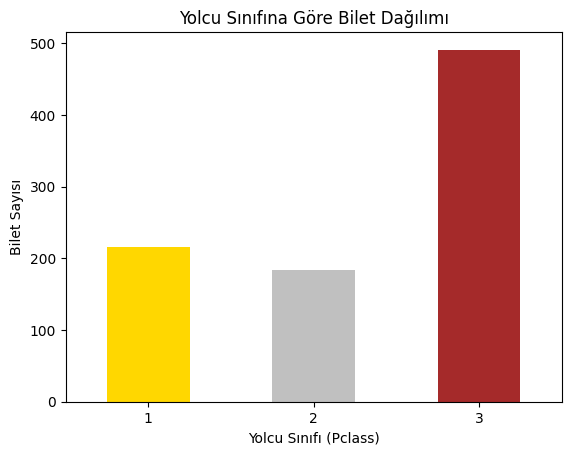

In [23]:
# pclass_df verisini bar chart olarak plot ediyoruz
pclass_df.plot(kind='bar', color=['gold', 'silver', 'brown'])

# Grafik detaylarını ekleyelim
plt.title('Yolcu Sınıfına Göre Bilet Dağılımı')
plt.xlabel('Yolcu Sınıfı (Pclass)')
plt.ylabel('Bilet Sayısı')
plt.xticks(rotation=0) # Eksen yazılarını düzeltir
plt.show()

Şimdi hayatta kalanlara **survivors** bakalım.

❓ Her yolcu sınıfının hayatta kalma oranını  *survival rate* gösteren bir bar chart plot et.
`0` ,  o sınıfta kimsenin hayatta kalmadığı, `1` ise herkesin hayatta kaldığı anlamına gelir. 

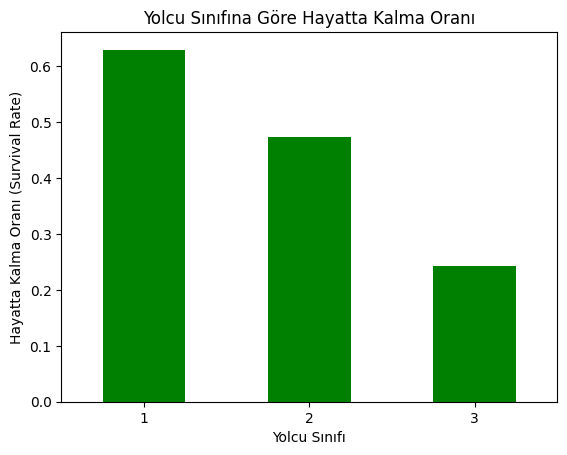

In [24]:
# Her sınıfın hayatta kalma (Survived) ortalamasını alıp bar chart çizdiriyoruz
# 1 = Hayatta kaldı, 0 = Hayatta kalmadı olduğu için ortalama bize 'rate'i verir.
titanic_df.groupby('Pclass')['Survived'].mean().plot(kind='bar', color='green')

# Grafik detayları
plt.title('Yolcu Sınıfına Göre Hayatta Kalma Oranı')
plt.xlabel('Yolcu Sınıfı')
plt.ylabel('Hayatta Kalma Oranı (Survival Rate)')
plt.xticks(rotation=0)
plt.show()

### Gender Analysis

`Sex`  sütununa bir göz atalım.

❓ Bu sütunda kullanılan farklı değerleri kontrol etmek için [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) fonksiyonunu kullan.

In [27]:
print(titanic_df['Sex'].unique())

['male' 'female']


❓ Her cinsiyetin hayatta kalma oranını *survival rate*  gösteren bir bar chart plot et.
Verilere göre, hangi cinsiyetin hayatta kalma ihtimali daha yüksekti?

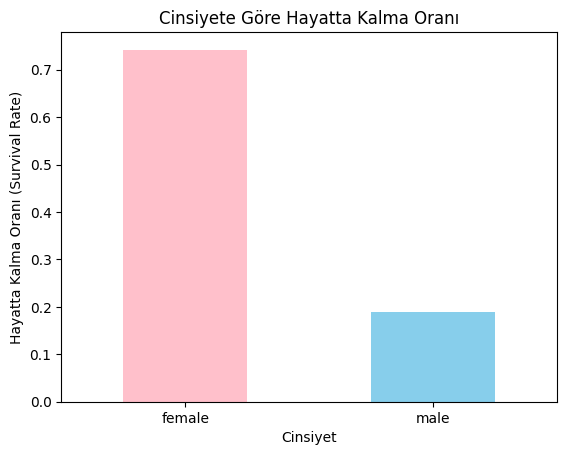

In [28]:
# Cinsiyete göre gruplayıp Survived sütununun ortalamasını alıyoruz
titanic_df.groupby('Sex')['Survived'].mean().plot(kind='bar', color=['pink', 'skyblue'])

# Grafik detayları
plt.title('Cinsiyete Göre Hayatta Kalma Oranı')
plt.xlabel('Cinsiyet')
plt.ylabel('Hayatta Kalma Oranı (Survival Rate)')
plt.xticks(rotation=0)
plt.show()

Her cinsiyet için toplam yolcu sayısını ve toplam hayatta kalan sayısını birlikte gösterdiğimiz daha şık bir histogram oluşturalım.

❓`Total` ve `Survived`  olmak üzere iki sütunlu, `male` and `female` şeklinde iki satırlı bir `survivors_df` DataFrame oluştur ve plot et.

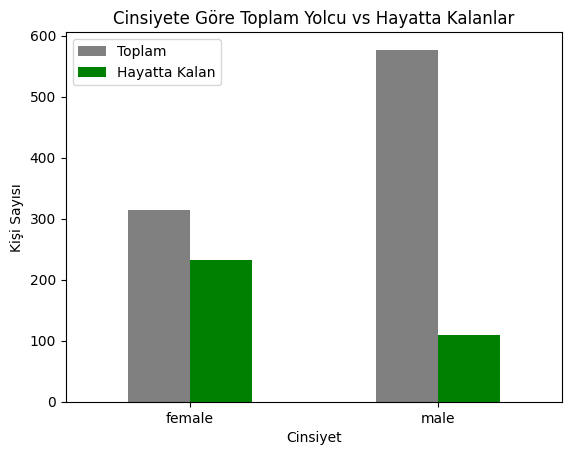

        Total  Survived
Sex                    
female    314       233
male      577       109


In [29]:
# 1. Toplam yolcu sayılarını alalım (Total)
total_by_gender = titanic_df.groupby('Sex')['PassengerId'].count()

# 2. Sadece hayatta kalanları (Survived=1) alıp cinsiyete göre sayalım (Survived)
survived_by_gender = titanic_df[titanic_df['Survived'] == 1].groupby('Sex')['PassengerId'].count()

# 3. survivors_df adında yeni bir DataFrame oluşturuyoruz
survivors_df = pd.DataFrame({
    'Total': total_by_gender,
    'Survived': survived_by_gender
})

# 4. Sonucu yan yana bar chart (histogram tarzı) olarak plot ediyoruz
survivors_df.plot(kind='bar', color=['gray', 'green'])
plt.title('Cinsiyete Göre Toplam Yolcu vs Hayatta Kalanlar')
plt.xlabel('Cinsiyet')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=0)
plt.legend(["Toplam", "Hayatta Kalan"])
plt.show()

# Tabloyu da görelim
print(survivors_df)

## Children

Önceki analiz yaşları dikkate almıyordu. Bir çocuğu bir yetişkinden ayırmak ve bunun hayatta kalma oranlarını *survival rates* nasıl etkilediğini görmek istiyoruz.

❓ Boolean indexing kullanarak yalnızca çocuk yolcuların satırlarını içeren bir `children_df` oluştur.

In [31]:
# Yaşı 18'den küçük olanları filtreleyip children_df oluşturuyoruz
children_df = titanic_df[titanic_df['Age'] < 18]

children_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q


❓ Titanic’te kaç çocuk vardı?

In [32]:
# Toplam çocuk sayısı
toplam_cocuk = len(children_df)
print(f"Titanic'te toplam {toplam_cocuk} çocuk yolcu vardı.")

Titanic'te toplam 113 çocuk yolcu vardı.


❓Kaç çocuk hayatta kaldı?

In [33]:
# Survived sütunundaki 1'leri topluyoruz
hayatta_kalan_cocuk = children_df['Survived'].sum()
print(f"Hayatta kalan çocuk sayısı: {hayatta_kalan_cocuk}")

# Hayatta kalma oranı
cocuk_survival_rate = children_df['Survived'].mean()
print(f"Çocukların hayatta kalma oranı: %{cocuk_survival_rate * 100:.2f}")

Hayatta kalan çocuk sayısı: 61
Çocukların hayatta kalma oranı: %53.98


❓ Her kategori için( `male`, `female`, `children`).hayatta kalanlar / toplam oranını gösteren bir bar chart plot et. Unutma: `male` istatistiklerinden erkek çocukları, `female` istatistiklerinden ise kız çocukları çıkarman **substract** gerekiyor.

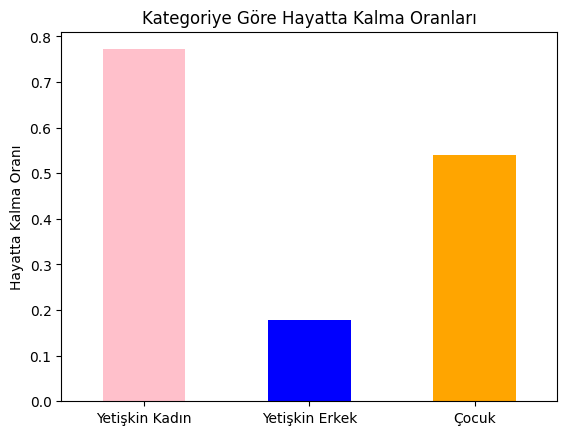

In [34]:
# 1. Grupları netleştirelim
# Çocuklar (zaten elimizde: children_df)
# Yetişkin Kadınlar (Yaşı >= 18 ve Sex == 'female')
adult_female_df = titanic_df[(titanic_df['Age'] >= 18) & (titanic_df['Sex'] == 'female')]
# Yetişkin Erkekler (Yaşı >= 18 ve Sex == 'male')
adult_male_df = titanic_df[(titanic_df['Age'] >= 18) & (titanic_df['Sex'] == 'male')]

# 2. Oranları hesaplayalım
rates = pd.Series({
    'Yetişkin Kadın': adult_female_df['Survived'].mean(),
    'Yetişkin Erkek': adult_male_df['Survived'].mean(),
    'Çocuk': children_df['Survived'].mean()
})

# 3. Grafik çizdirelim
rates.plot(kind='bar', color=['pink', 'blue', 'orange'])
plt.title('Kategoriye Göre Hayatta Kalma Oranları')
plt.ylabel('Hayatta Kalma Oranı')
plt.xticks(rotation=0)
plt.show()

## [Opsiyonal] Big families

❓ Daha büyük ailelerin hayatta kalması daha mı zordu?

Burada, yolcunun aile büyüklüğünü gösteren yeni bir sütunu `DataFrame` ine ekleyeceksin.
  

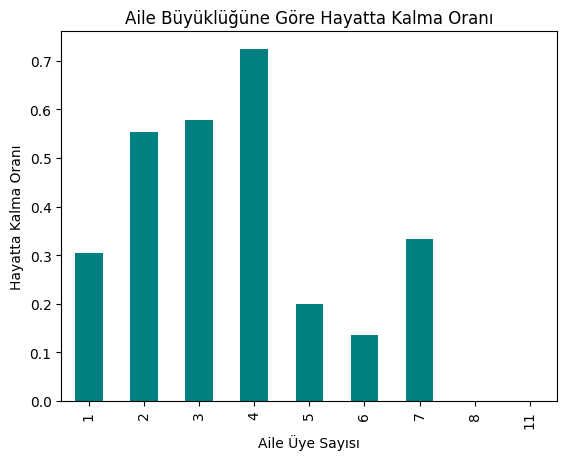

In [35]:
# 1. Yeni 'FamilySize' sütunu oluşturalım
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

# 2. Aile büyüklüğüne göre hayatta kalma oranını inceleyelim
titanic_df.groupby('FamilySize')['Survived'].mean().plot(kind='bar', color='teal')
plt.title('Aile Büyüklüğüne Göre Hayatta Kalma Oranı')
plt.xlabel('Aile Üye Sayısı')
plt.ylabel('Hayatta Kalma Oranı')
plt.show()

## [Opsiyonal] Distinguished titles

❓ Tahliye sırasında ünvanı (Mr, Mrs, Dr vb.) olan yolculara daha fazla öncelik verildi mi?

Bunu incelemek için, bazı string manipülasyonları yaparak her yolcu için ünvanını içeren yeni bir sütun oluştur.

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


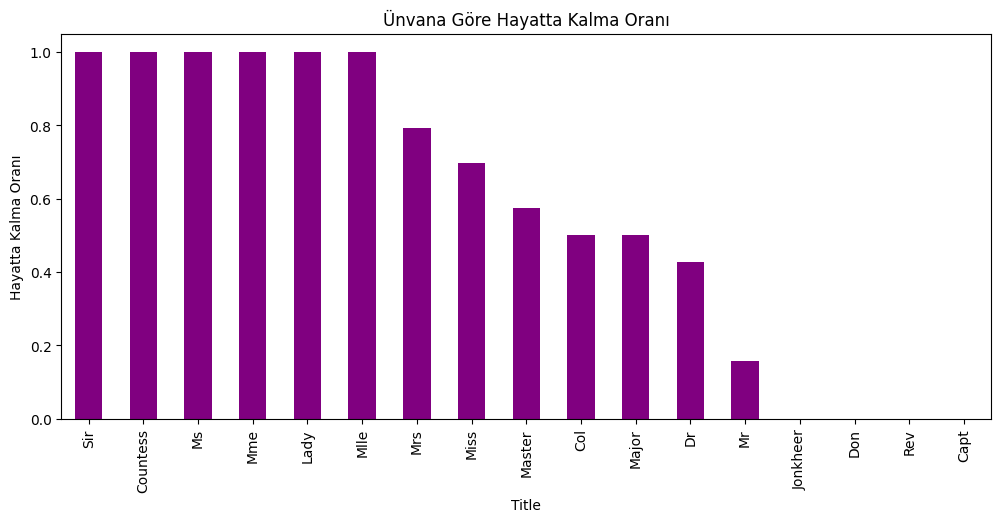

In [36]:
# 1. İsimlerden ünvanları ayıklamak için regex (düzenli ifade) kullanıyoruz
# İsimler genelde "Soyad, Ünvan. Ad" formatındadır
titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# 2. Hangi ünvandan kaç kişi var görelim
print(titanic_df['Title'].value_counts())

# 3. Ünvanlara göre hayatta kalma oranlarını karşılaştıralım
plt.figure(figsize=(12, 5))
titanic_df.groupby('Title')['Survived'].mean().sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('Ünvana Göre Hayatta Kalma Oranı')
plt.ylabel('Hayatta Kalma Oranı')
plt.show()